In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
from sklearn.preprocessing import LabelBinarizer
import keras

In [17]:
def load_mnist(flatten = False):
    (x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
    print(x_train.shape,y_train.shape,x_test.shape,y_test)
    #normalization
    x_train=x_train.astype(float)/255
    x_test = x_test.astype(float)/255
    #data separation
    x_train = x_train[:-10000]
    x_val=x_train[-10000:]
    y_train = y_train[:-10000]
    y_val = y_train[-10000:]
    
    print(x_val.shape,y_val.shape)
    if flatten:
        x_train = x_train.reshape([x_train.shape[0],-1])
        x_val = x_val.reshape([x_val.shape[0],-1])
        x_test = x_test.reshape([x_train.shape[0],-1])
    return x_train,y_train,x_val,y_val,x_test,y_test

In [18]:
x_train,y_train,x_val,y_val,x_test,y_test = load_mnist()

(60000, 28, 28) (60000,) (10000, 28, 28) [7 2 1 ... 4 5 6]
(10000, 28, 28) (10000,)


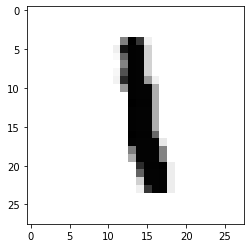

In [34]:
y_train[6]
plt.imshow(x_train[6],cmap='Greys')

In [43]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [35]:
#### changing dimension of input from N*28*28 to N*784

In [45]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])


IndexError: tuple index out of range

In [46]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [49]:
x_train.shape

(50000, 784)

In [50]:
x_test.shape

(10000, 784)

In [51]:
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

In [52]:
y_train.shape

(50000, 10)

In [53]:
y_test.shape 

(10000, 10)

In [54]:
num_classes = y_train.shape[1]
num_feature = x_train.shape[1]
num_output = y_train.shape[1]
num_layers_0=512
num_layers_1=256


In [55]:
start_learning_rate = 0.001
regularizer_rate = 0.1

In [56]:
import tensorflow.compat.v1 as tf

In [57]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [58]:
input_x=tf.placeholder('float32',shape=(None,num_feature),name="imput_x")
input_y=tf.placeholder('float32',shape=(None,num_classes),name="imput_y")
keep_prob=tf.placeholder(tf.float32)

In [60]:
#input layer
wt_0=tf.Variable(tf.random_normal([num_feature,num_layers_0],stddev=1/tf.sqrt(float(num_feature))))
bias_0 =tf.Variable(tf.random_normal([num_layers_0]))

#hidden layer
wt_1=tf.Variable(tf.random_normal([num_layers_0,num_layers_1],stddev=1/tf.sqrt(float(num_layers_0))))
bias_1 =tf.Variable(tf.random_normal([num_layers_1]))

#output layer
wt_2=tf.Variable(tf.random_normal([num_layers_1,num_output],stddev=1/tf.sqrt(float(num_layers_1))))
bias_2 =tf.Variable(tf.random_normal([num_output]))

In [61]:
hidden_output_0 = tf.nn.relu(tf.matmul(input_x,wt_0)+bias_0)
hidden_output_00 = tf.nn.dropout(hidden_output_0,keep_prob)


hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_00,wt_1)+bias_1)
hidden_output_11 = tf.nn.dropout(hidden_output_1,keep_prob)

pred_y = tf.sigmoid(tf.matmul(hidden_output_11,wt_2)+bias_2)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [66]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred_y,labels=input_y))+regularizer_rate*(tf.reduce_mean(tf.square(bias_0))*(tf.reduce_mean(tf.square(bias_1))))


In [68]:

learn_rate = tf.train.exponential_decay(start_learning_rate,0,5,0.85,staircase=True)
optimizer=tf.train.AdamOptimizer(learn_rate).minimize(loss,var_list=[wt_0,wt_1,wt_2,bias_0,bias_1,bias_2])

In [70]:
correct_pred = tf.equal(tf.argmax(y_train,1),tf.argmax(pred_y,1))
acc = tf.reduce_max(tf.cast(correct_pred,tf.float32))

In [76]:
batch_size = 128
epochs = 125
dropout_prob = 0.6

In [72]:
training_acc= []
training_loss=[]
testing_acc=[]


In [73]:
s=tf.InteractiveSession()

In [75]:
from sklearn.metrics import accuracy_score

In [87]:
s.run(tf.global_variables_initializer())
for epoch in range(epochs):
    arr=np.arange(x_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,x_train[0].shape[0],batch_size):
        s.run(optimizer,{input_x:x_train[arr[index:index+batch_size]],input_y:y_train[arr[index:index+batch_size]],keep_prob:dropout_prob})
        training_acc.append(s.run(acc,feed_dict={input_x:x_train,input_y:y_train,keep_prob:1}))
        testing_acc.append(accuracy_score(y_test.argmax(1),s.run(pred_y,{input_x:x_test,keep_prob:1}).argmax(1)))
        training_loss.append(s.run(loss,{input_x:x_train,input_y:y_train,keep_prob:1}))
    print("epochs:{0},train loss:{1:2f},train acc:{2:3f},test acc:{3:.3f}".format(epoch,training_loss[epoch],training_acc[epoch],testing_acc[epoch]))

epochs:0,train loss:2.285329,train acc:1.000000,test acc:0.103
epochs:1,train loss:2.445000,train acc:0.353500,test acc:0.105
epochs:2,train loss:2.405360,train acc:1.000000,test acc:0.162
epochs:3,train loss:2.373852,train acc:0.475000,test acc:0.303
epochs:4,train loss:2.341856,train acc:1.000000,test acc:0.292
epochs:5,train loss:2.313454,train acc:0.593800,test acc:0.347
epochs:6,train loss:2.288434,train acc:1.000000,test acc:0.442
epochs:7,train loss:2.263723,train acc:0.472500,test acc:0.518
epochs:8,train loss:2.240455,train acc:1.000000,test acc:0.572
epochs:9,train loss:2.411162,train acc:0.102800,test acc:0.616
epochs:10,train loss:2.390534,train acc:1.000000,test acc:0.675
epochs:11,train loss:2.369129,train acc:0.152500,test acc:0.695
epochs:12,train loss:2.344568,train acc:1.000000,test acc:0.704
epochs:13,train loss:2.318903,train acc:0.177400,test acc:0.711
epochs:14,train loss:2.295290,train acc:1.000000,test acc:0.710
epochs:15,train loss:2.269844,train acc:0.205700,t